## Introduction to R: CASOS DIVERSOS (BIOLOGIA Y MEDICINA) usando colabs de Jupyter notebooks 2024

Colab puede utilizarse tambien para ejecutar R, y es muy sencillo utilizarse, ver en: https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497

Un lugar interesante para consultar: Ciencia de datos para curiosos-Martin Montane 2020-05-10, en https://martinmontane.github.io/CienciaDeDatosBook/index.html#qu%C3%A9-necesitamos-para-arrancar


Los ejercicios y ejemplos proporcionados en este apartado se basan en materiales propios y de acceso libre, y su único propósito es el uso docente.
Se ha hecho un esfuerzo para garantizar la precisión y confiabilidad de la información, sin embargo, es importante tener en cuenta que la información puede cambiar con el tiempo.
Se recomienda a los usuarios que consulten fuentes adicionales y verifiquen la información por sí mismos antes de tomar cualquier decisión o acción basada en la información proporcionada aquí.


# Gráficos sencillos con la libería ggplot2 y ggplot

https://martinmontane.github.io/CienciaDeDatosBook/visualizaciones-de-datos-en-r.html#la-importancia-de-la-visualizaci%C3%B3n-de-los-datos

La importancia de la visualización de los datos
La visualización de datos ha ganado espacio en diversas publicaciones y en las últimas décadas ya constituye una disciplina en sí misma. Su relevancia podría justificarse de muchas maneras, pero hay un punto que es especialmente relevante para el análisis de datos: los parámetros y coeficientes con los que solemos trabajar no siempre son tan simples de interpretar como pensamos. Por ejemplo, algunos autores recomiendan fuertemente graficar las predicciones del modelo ante distintos valores, antes que los coeficientes del modelo (McElreath, 2016).

Veamos un ejemplo muy sencillo para hacer un plot con la librería ggplot2, una de las más conocidas y potentes

In [ ]:
a <- c(2,4,5)
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#una simulacion
set.seed(1234)
df <- data.frame(
  sex=factor(rep(c("F", "M"), each=200)),
  weight=round(c(rnorm(200, mean=55, sd=5), rnorm(200, mean=65, sd=5)))
  )
head(df)

sex weight
1 F   49    
2 F   56    
3 F   60    
4 F   43    
5 F   57    
6 F   58

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


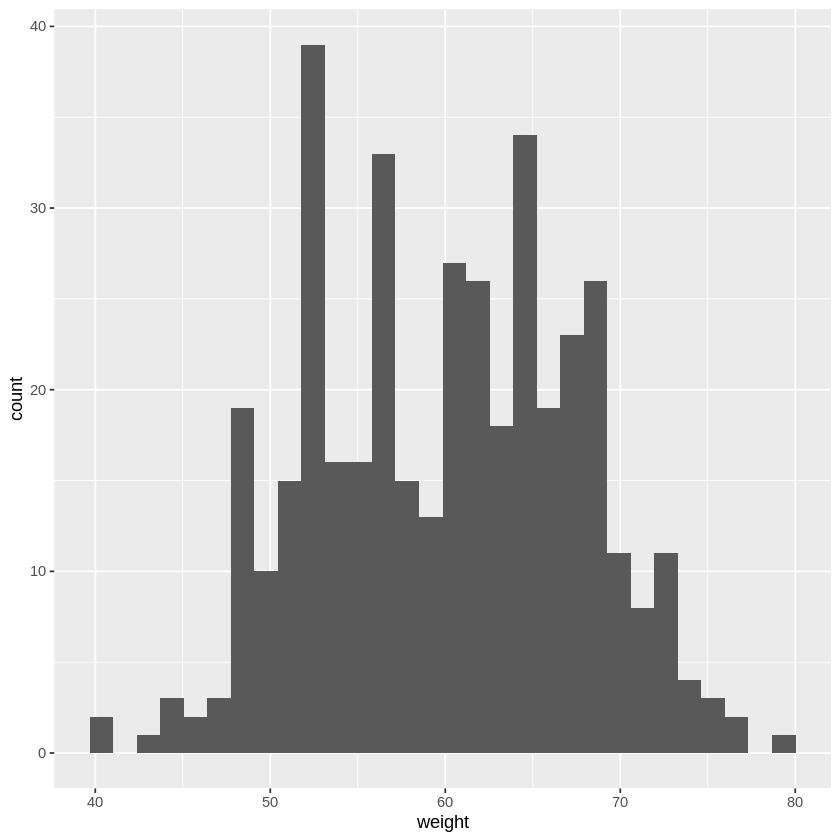

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


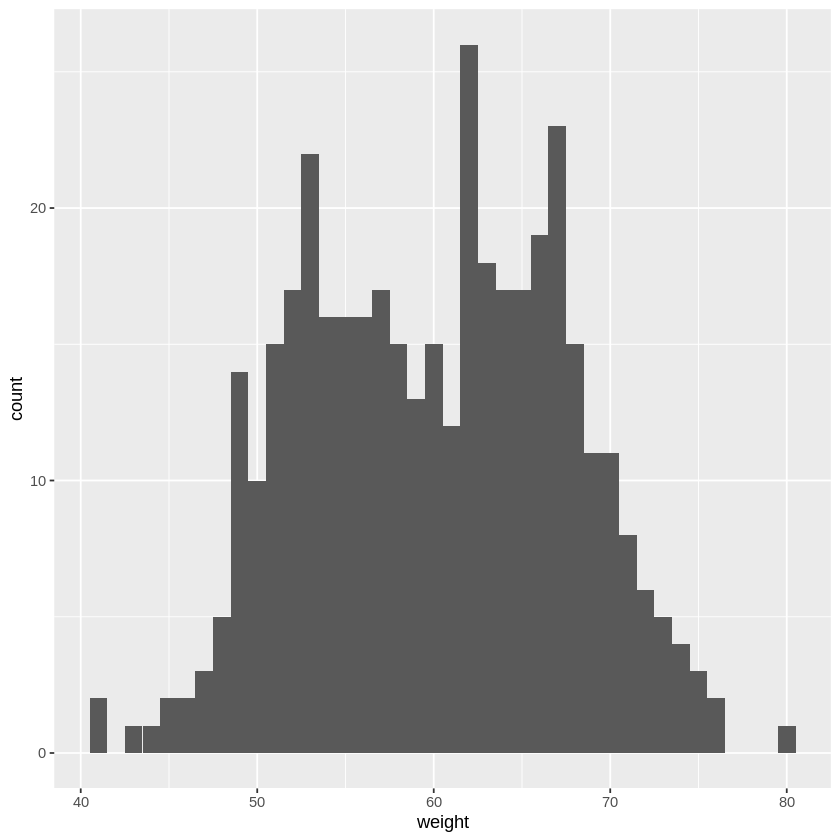

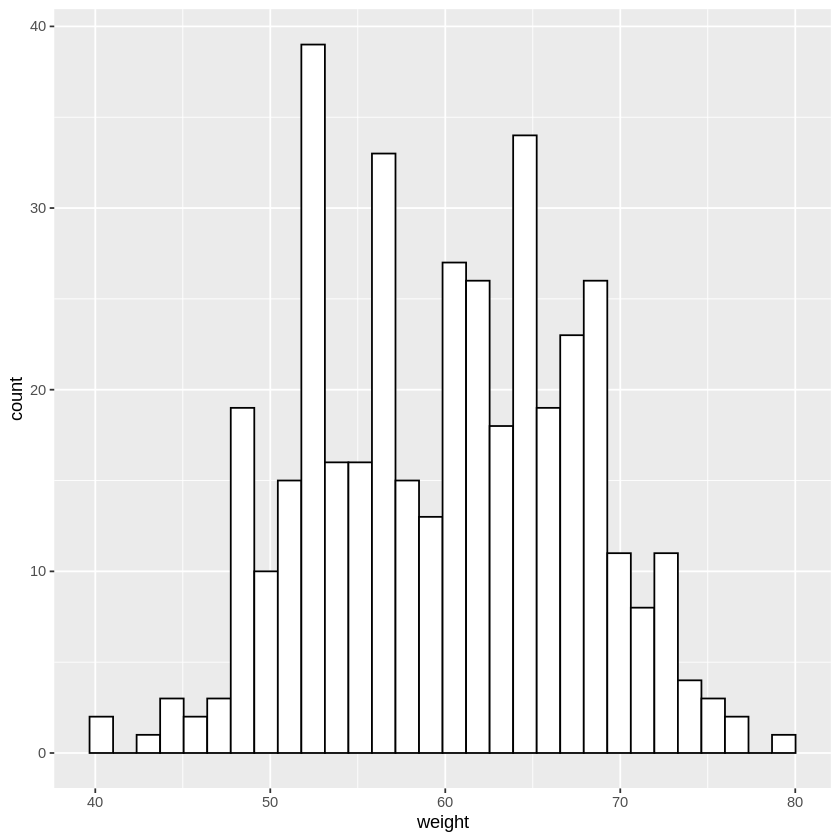

In [ ]:
library(ggplot2)
# Basic histogram
ggplot(df, aes(x=weight)) + geom_histogram()
# Change the width of bins
ggplot(df, aes(x=weight)) +
  geom_histogram(binwidth=1)
# Change colors
p<-ggplot(df, aes(x=weight)) +
  geom_histogram(color="black", fill="white")
p

Histograma normal con modelo normal (función de densidad)

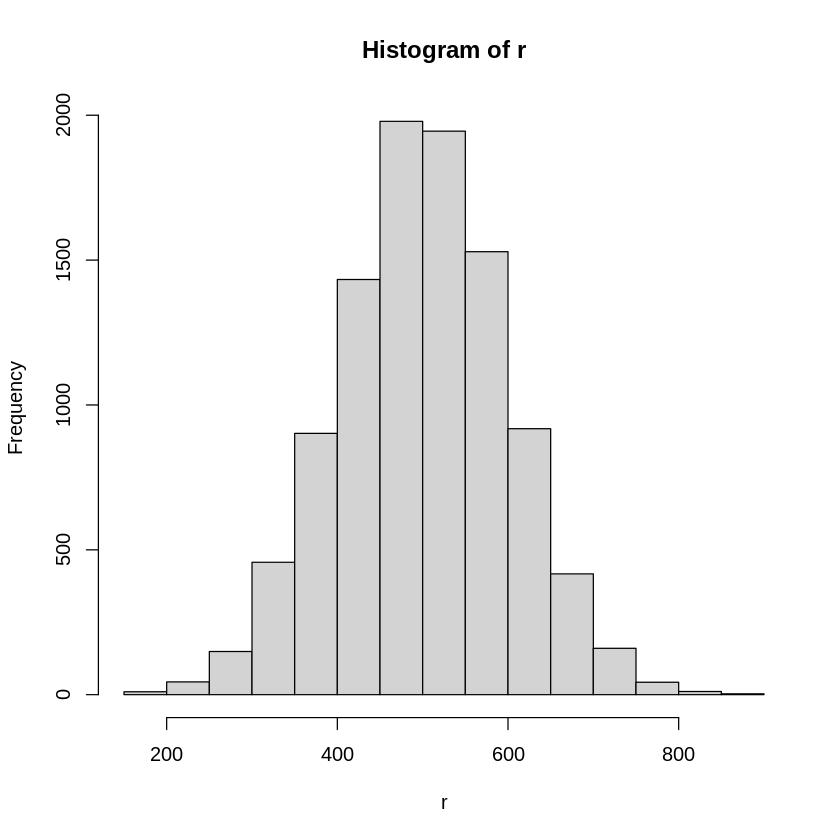

In [ ]:
#see in https://michaelgastner.com/R_for_QR/visual-comparisons-of-data-with-a-normal-model.html

r <- rnorm(10000, mean = 500, sd = 100)
hist(r)



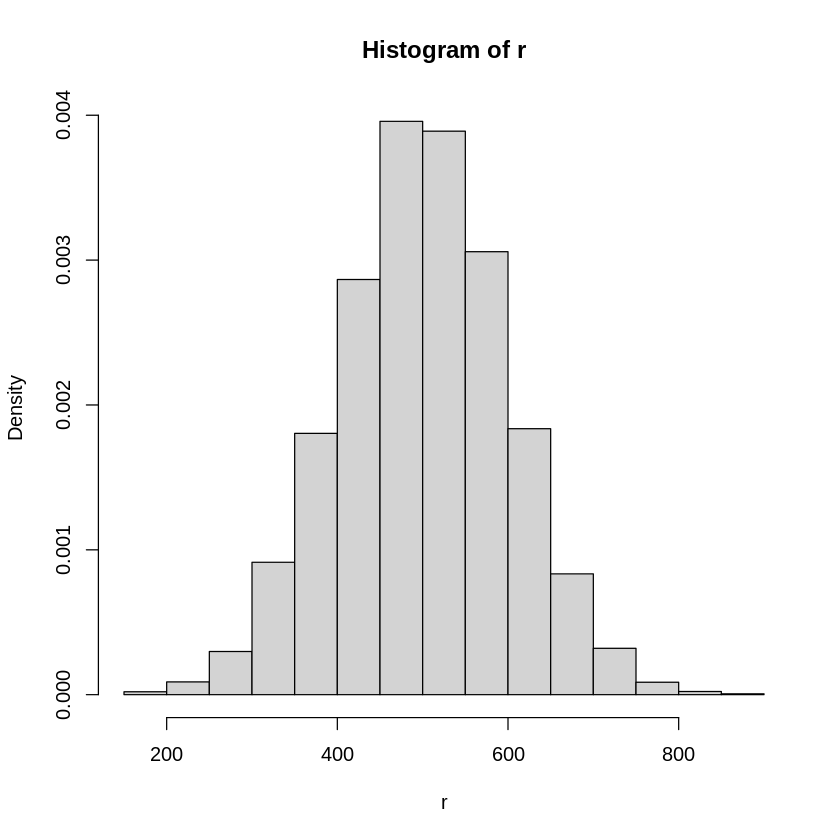

In [ ]:
hist(r, freq = FALSE)

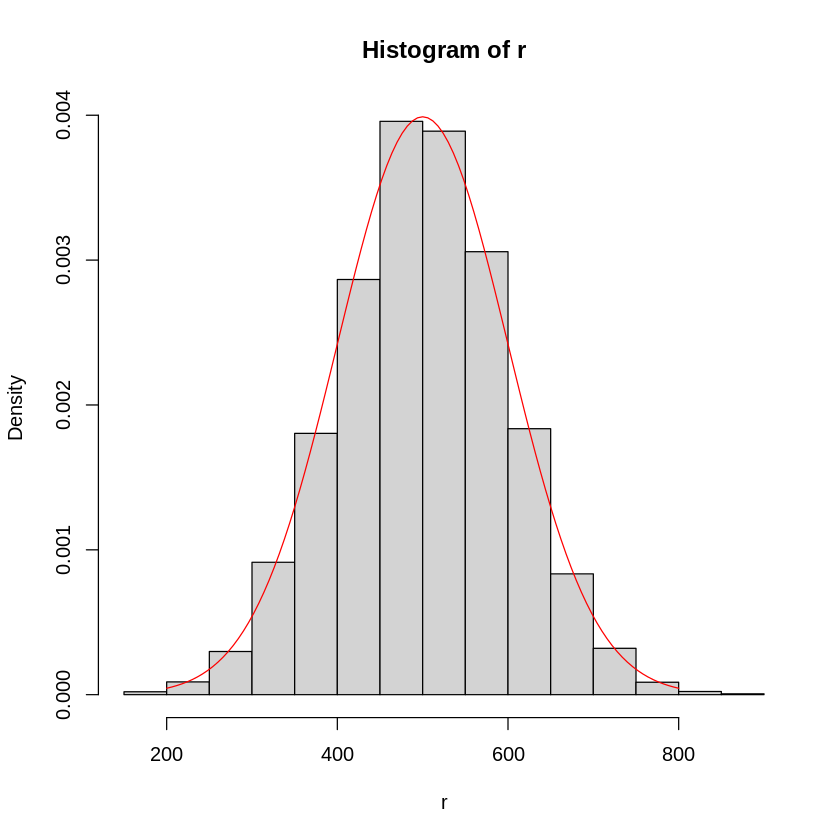

In [ ]:
hist(r, freq = FALSE)
curve(dnorm(x, mean = 500, sd = 100),
      from = 200,
      to = 800,
      add = TRUE,
      col = "red")

GGPLOT: Grammar of Graphics
Cuando se trata de hacer visualizaciones en R, ggplot es, por lejos, nuestro principal aliado y la librería más ampliamente difundida. Este paquete viene incluido dentro de tidyverse, por lo que cargando dicho paquete ya van a contar con todas sus funciones.

Con ggplot podemos crear decenas de distintos tipos de gráficos mediante una sintáxis unificada, lo que hace que se ganen importante economías de escala, una vez superada la curva de aprendizaje.

In [ ]:
library(tidyverse)


#EJERCICIO SOBRE LA ESPERANZA DE VIDA

Ver en: https://martinmontane.github.io/CienciaDeDatosBook/visualizaciones-de-datos-en-r.html#la-importancia-de-la-visualizaci%C3%B3n-de-los-datos

¿Cuál es la relación entre el ingreso de un país y la expectativa de vida al nacer? Scatterplot
Una nube de puntos o scatter plot es un tipo de gráfico que, por lo general, muestra la relación entre dos variables. Digo por lo general, porque en rigor es posible agregar otra información en estos gráficos mediante colores o tamaños de los puntos. Sigamos con el ejemplo del capitulo dos: los datos de gapminder. Vamos a filtrar los datos para el año 2007, el último en este dataset.

In [ ]:
gapminder_df <- read.table(file = "https://raw.githubusercontent.com/martintinch0/CienciaDeDatosParaCuriosos/master/data/gapminder.csv",
                           sep=';',
                           header = TRUE,
                           stringsAsFactors = FALSE)
gapminderLastCut <- gapminder_df %>% filter(year==2007)

Ya podemos comenzar con nuestro primer ejemplo. ggplot comienza siempre de la misma manera: usando la función homónima y comentando que datos queremos graficar. Luego, le decimos qué tipo de gráfico queremos hacer, lo que en GG se hace con geom_, seguido por un sufijo que hace referencia específica al tipo de gráfico.

Además, GGPLOT no hace magia: en este caso, necesita saber qué variable poner en el eje x y cuál otra poner en el eje y. En ggplot, estas últimas indicaciones van dentro de una función que se llama aes(), que es la abreviación de aesthetics.

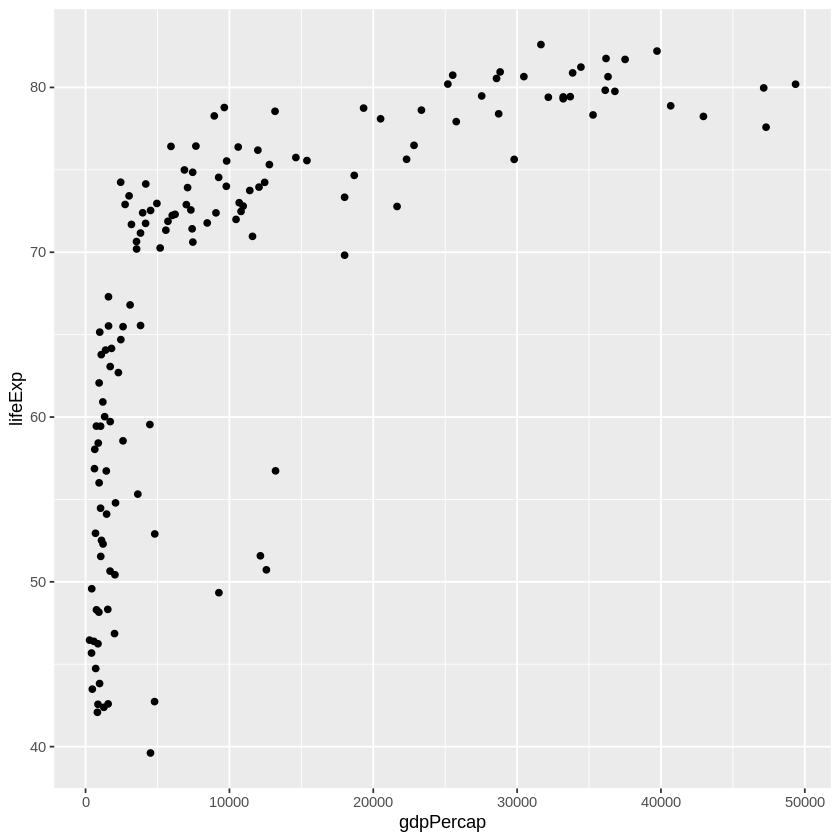

In [ ]:
ggplot(data = gapminderLastCut,
       mapping = aes(x=gdpPercap, y = lifeExp)) +
  geom_point()

Nuestro gráfico scatter, que en ggplot se hace con geom_point(), muestra en el eje horizontal el PIB per cápita de los países y en el eje vertical la expectativa de vida al nacer. La grilla de fondo de color gris y los títulos de los ejes son defaults de ggplot, así como la - no tan recomendada - decisión de cortar al eje vertical en un valor levemente superior a 40 años.

Una vez que tenemos los datos que queremos en nuestro gráfico, podemos empezar a cambiar estos detalles que pueden no gustarnos. Para empezar, los títulos de los ejes tienen por definición el nombre de las variables, vamos a ponerles nombres más acordes a lo que estamos mostrando. Como irán aprendiendo, estos cambios van en distintas partes de nuestro código de ggplot mediante nuevas funciones agregadas por medio de +:

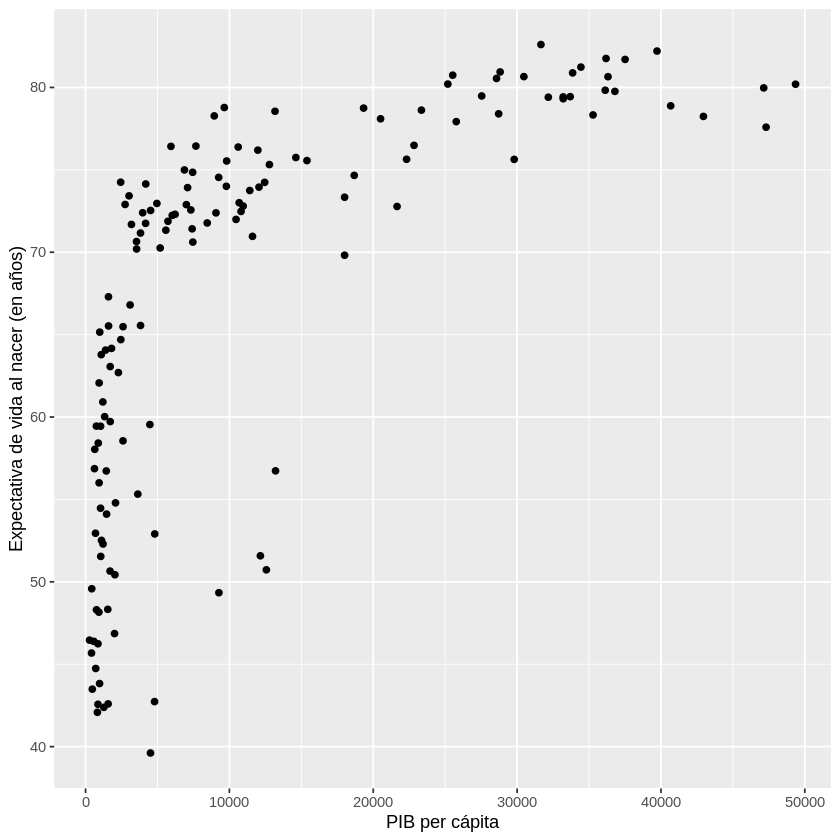

In [ ]:
ggplot(data = gapminderLastCut,
       mapping = aes(x=gdpPercap, y = lifeExp)) +
  geom_point() +
  labs(x = "PIB per cápita",
       y = "Expectativa de vida al nacer (en años)")

En este caso usamos la función labs(), con sus respectivos parámetros x e y, a los que les pasamos directamente el nombre que queremos que tenga. La función labs permite más cosas que esto, como agregar título, subtítulos e incluso información sobre la fuente de nuestro gráfico:

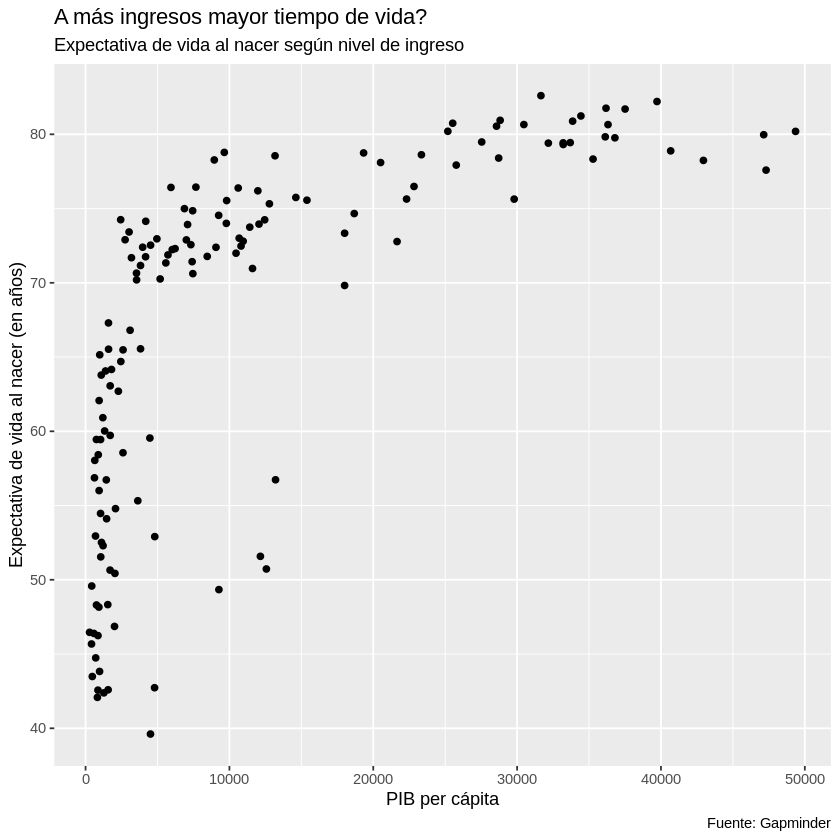

In [ ]:
ggplot(data = gapminderLastCut,
       mapping = aes(x=gdpPercap, y = lifeExp)) +
  geom_point() +
  labs(x = "PIB per cápita",
       y = "Expectativa de vida al nacer (en años)",
       title="A más ingresos mayor tiempo de vida?",
       subtitle="Expectativa de vida al nacer según nivel de ingreso",
       caption="Fuente: Gapminder")

Agregando colores según otras variables
En nuestro data.frame de gapminder contamos con otra variable que sería de interés mostrar: el continente del país que hablamos. Esta variable es de tipo categórica y es muy común agregar esta clase de variables en nuestros gráficos de dispersión o scatter plots

Agregar esta clase de información es realmente fácil. Dentro de la función aes(), además de determinar cuáles son los valores del eje vertical (y) y del eje horizontal (x), podemos indicar cuál es la variable según la cual queremos que ponga los colores: mediante el argumento color

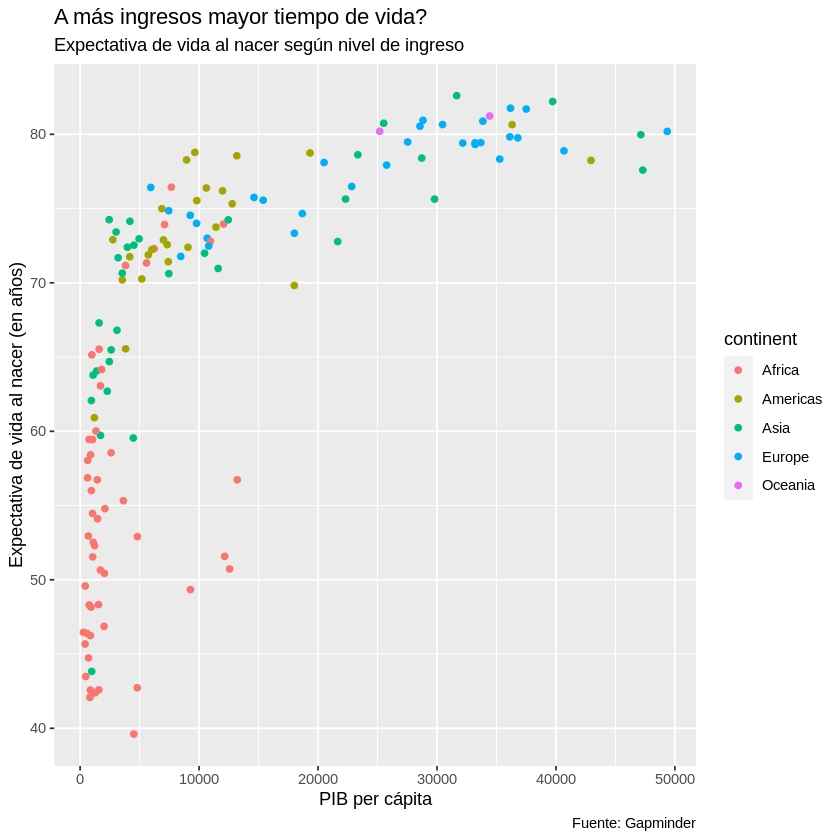

In [ ]:
ggplot(data = gapminderLastCut,
       mapping = aes(x=gdpPercap, y = lifeExp,color=continent)) +
  geom_point() +
  labs(x = "PIB per cápita",
       y = "Expectativa de vida al nacer (en años)",
       title="A más ingresos mayor tiempo de vida?",
       subtitle="Expectativa de vida al nacer según nivel de ingreso",
       caption="Fuente: Gapminder")

Podemos observar cómo los colores no se distribuyen aleatoriamente entre niveles de ingreso, sino que se ubican más o menos en los mismos rangos, con algunas excepciones. Más adelante vamos a ver un gráfico que nos va a ser útil para detectar estás diferencias.

Creando paneles con facet_wrap()
Los paneles son realmente fáciles de armar en ggplot. Lo unico que debemos decirle es que queremos hacerlos y qué variable usaremos para cortar a nuestros datos y mostrarlos de a partes. Imaginemos que queremos mostrar el mismo gráfico de relación entre PIB per cápita y expectativas de vida al nacer (en años) que hicimos anteriormente, pero para cada uno de los continentes por separados: muy simple.

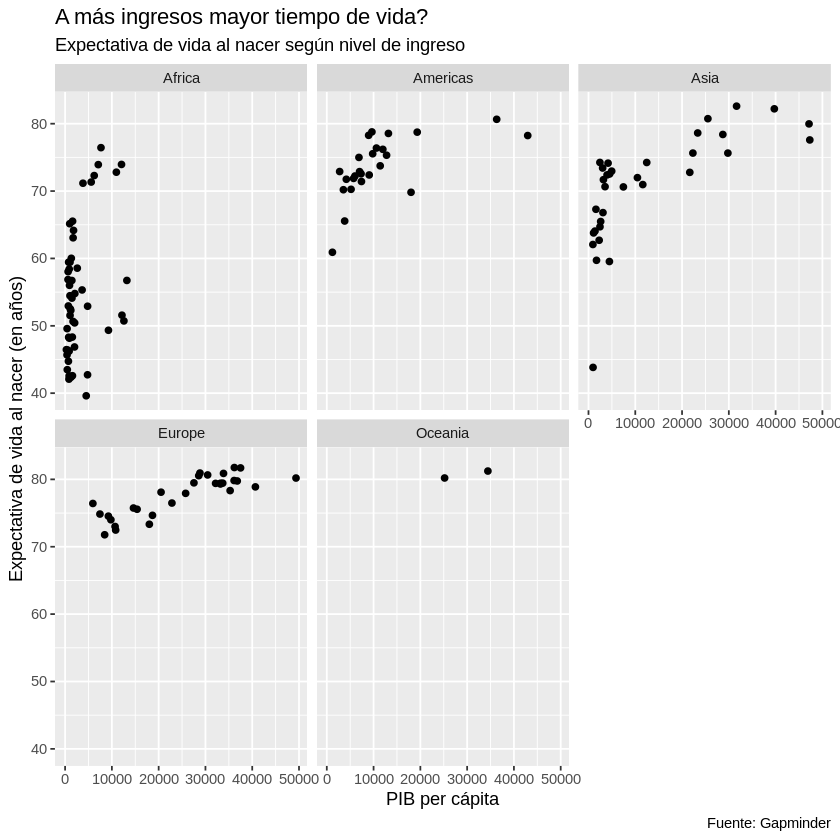

In [ ]:
ggplot(data = gapminderLastCut,
       mapping = aes(x=gdpPercap, y = lifeExp)) +
  geom_point() +
  labs(x = "PIB per cápita",
       y = "Expectativa de vida al nacer (en años)",
       title="A más ingresos mayor tiempo de vida?",
       subtitle="Expectativa de vida al nacer según nivel de ingreso",
       caption="Fuente: Gapminder") +
  facet_wrap(~ continent)

 ¿Cuál fue la evolución de la expectativa de vida al nacer? Gráfico de líneas
Otro de los gráficos más simples consiste en analizar la evolución de una determinada variable en el tiempo mediante una línea de tiempo. En ggplot estos gráficos pueden crearse usando geom_line.

Digamos que queremos observar la evolución de la expectativa de vida al nacer promedio por continente. Usando las herramientas de tidyverse podemos generar este promedio de la siguiente manera:

In [ ]:
promedioContinente <- gapminder_df %>%
                      group_by(continent,year) %>%
                      summarise(promedio=mean(lifeExp))

                    promedioContinente

`summarise()` has grouped output by 'continent'. You can override using the
`.groups` argument.


continent year promedio
1  Africa    1952 39.13550
2  Africa    1957 41.26635
3  Africa    1962 43.31944
4  Africa    1967 45.33454
5  Africa    1972 47.45094
6  Africa    1977 49.58042
7  Africa    1982 51.59287
8  Africa    1987 53.34479
9  Africa    1992 53.62958
10 Africa    1997 53.59827
11 Africa    2002 53.32523
12 Africa    2007 54.80604
13 Americas  1952 53.27984
14 Americas  1957 55.96028
15 Americas  1962 58.39876
16 Americas  1967 60.41092
17 Americas  1972 62.39492
18 Americas  1977 64.39156
19 Americas  1982 66.22884
20 Americas  1987 68.09072
21 Americas  1992 69.56836
22 Americas  1997 71.15048
23 Americas  2002 72.42204
24 Americas  2007 73.60812
25 Asia      1952 46.31439
26 Asia      1957 49.31854
27 Asia      1962 51.56322
28 Asia      1967 54.66364
29 Asia      1972 57.31927
30 Asia      1977 59.61056
31 Asia      1982 62.61794
32 Asia      1987 64.85118
33 Asia      1992 66.53721
34 Asia      1997 68.02052
35 Asia      2002 69.23388
36 Asia      2007 70.72848
37 Europe    1952 64.40850
38 Europe    1957 66.70307
39 Europe    1962 68.53923
40 Europe    1967 69.73760
41 Europe    1972 70.77503
42 Europe    1977 71.93777
43 Europe    1982 72.80640
44 Europe    1987 73.64217
45 Europe    1992 74.44010
46 Europe    1997 75.50517
47 Europe    2002 76.70060
48 Europe    2007 77.64860
49 Oceania   1952 69.25500
50 Oceania   1957 70.29500
51 Oceania   1962 71.08500
52 Oceania   1967 71.31000
53 Oceania   1972 71.91000
54 Oceania   1977 72.85500
55 Oceania   1982 74.29000
56 Oceania   1987 75.32000
57 Oceania   1992 76.94500
58 Oceania   1997 78.19000
59 Oceania   2002 79.74000
60 Oceania   2007 80.71950

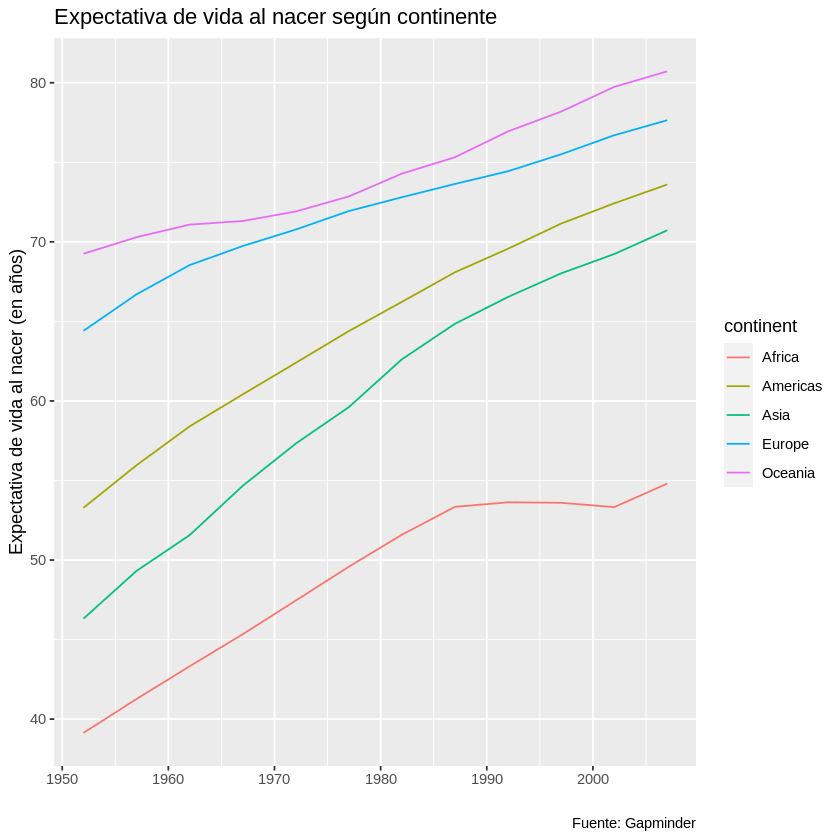

In [ ]:
ggplot(data = promedioContinente,
       mapping = aes(x=year, y = promedio,color=continent)) +
  geom_line() +
  labs(x = "",
       y = "Expectativa de vida al nacer (en años)",
       title="Expectativa de vida al nacer según continente",
       caption="Fuente: Gapminder")

## Ejercicios de R (Biology 304: Biological Data Analysis) SUPERVIVENCIA EN EL TITANIC
Fuente: https://bio304-class.github.io/bio304-book/index.html

This introductory chapter illustrates some of the tools and concepts you’ll learn in this class, such as visualization, data restructuring, and model building. By the end of this course, you should be able to carry out similar analyses and make well reasoned interpreation of those analyses for a variety of complex biological data.

On April 10, 1912 the RMS Titanic left Southhampton, England headed for New York. Aboard were 2,435 passengers and 892 crew members. Five days later, about 20 minutes before midnight, the Titanic hit an iceberg in the frigid waters about 375 miles south of New Foundland. Within approximately two and a half hours the ship had split apart and sunk, leaving just over 700 survivors.

The titanic_data.csv file (available on the course git repository) containers information on 1309 passengers from aboard the Titanic (CSV stands for Comma-Separated-Values, a simple plain text format for storing spreadhsheet data). Variables in this data set include gender, age, ticketed class, the passenger’s destitation, whether they survived, etc. We’ll use this data set to explore some of the demographics of the passengers who were aboard the ship, and how their relationship to whether a passenger survived or not. For a detailed description of this data set, see this link.

We’ll use this data to explore whether the saying “Women and children first!” applied on the Titanic.

Libraries
First we’ll load some R libraries (packages) that contain useful functions that will make our analyses quicker and more efficient. We’ll discuss the functions that these libraries provide, and how to use libraries in general, in greater detail in a future lecture.

In [ ]:
library(ggplot2)
library(readr)
library(dplyr)
library(tidyr)
library(forcats)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Read the data


In [ ]:
titanic <- read_csv("https://raw.githubusercontent.com/bio304-class/bio304-course-notes/master/datasets/titanic_data.csv")
#> Parsed with column specification:
#> cols(
#>   pclass = col_integer(),
#>   survived = col_integer(),
#>   name = col_character(),
#>   sex = col_character(),
#>   age = col_double(),
#>   sibsp = col_integer(),
#>   parch = col_integer(),
#>   ticket = col_character(),
#>   fare = col_double(),
#>   cabin = col_character(),
#>   embarked = col_character(),
#>   boat = col_character(),
#>   body = col_integer(),
#>   home.dest = col_character()
#> )

Rows: 1309 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): name, sex, ticket, cabin, embarked, boat, home.dest
dbl (7): pclass, survived, age, sibsp, parch, fare, body

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The function read_csv does exactly what it advertises – reads a data set from a CSV file and returns it as an object we can compute on. In this case we assigned the variable name titanic to our data set. Simple enough!

In [ ]:
head(titanic)

pclass survived name                                            sex   
1 1      1        Allen, Miss. Elisabeth Walton                   female
2 1      1        Allison, Master. Hudson Trevor                  male  
3 1      0        Allison, Miss. Helen Loraine                    female
4 1      0        Allison, Mr. Hudson Joshua Creighton            male  
5 1      0        Allison, Mrs. Hudson J C (Bessie Waldo Daniels) female
6 1      1        Anderson, Mr. Harry                             male  
  age     sibsp parch ticket fare     cabin   embarked boat body
1 29.0000 0     0     24160  211.3375 B5      S        2     NA 
2  0.9167 1     2     113781 151.5500 C22 C26 S        11    NA 
3  2.0000 1     2     113781 151.5500 C22 C26 S        NA    NA 
4 30.0000 1     2     113781 151.5500 C22 C26 S        NA   135 
5 25.0000 1     2     113781 151.5500 C22 C26 S        NA    NA 
6 48.0000 0     0     19952   26.5500 E12     S        3     NA 
  home.dest                      
1 St Louis, MO                   
2 Montreal, PQ / Chesterville, ON
3 Montreal, PQ / Chesterville, ON
4 Montreal, PQ / Chesterville, ON
5 Montreal, PQ / Chesterville, ON
6 New York, NY

In [ ]:
names(titanic)

[1] "pclass"    "survived"  "name"      "sex"       "age"       "sibsp"    
 [7] "parch"     "ticket"    "fare"      "cabin"     "embarked"  "boat"     
[13] "body"      "home.dest"

If we simply wanted the dimensions of the data we could do:

In [ ]:
dim(titanic)

[1] 1309   14

Simple data wrangling
Two variables of interest to us are pclass (“passenger class”) and survived. These are categorical variables encoded as numbers. Before exploring the data we’re going to create derived “factor” variables from these, which will make our analyses more convenient. I’m also going to recode the “survived” information as the classes “died” and “lived”.

In [ ]:
titanic <- mutate(titanic,
                  passenger.class = fct_recode(as.factor(pclass),
                                               "1st" = "1", "2nd" = "2", "3rd" = "3"),
                  survival = fct_recode(as.factor(survived),
                                        "died" = "0", "lived" = "1"))

Having added to new variables to our data set, the dimensions and column names have changed:

In [ ]:
dim(titanic)

and

In [ ]:
names(titanic)

Note that there are now 16 columns in our data, the original 14 plus our two new derived variables

Categorizing passengers: Let’s start by exploring various aspects of the 1309 passengers in our data set.

First, let’s look at the gender breakdown:

In [ ]:
count(titanic, sex)

We could also represent this data as a bar graph (though a simple table is more efficient in this case):

In [ ]:
ggplot(titanic) +
  geom_bar(aes(x = sex, fill = sex))

Both our table and bar graph tell us that there are almost twice as many men in our data set as women.

How many people survived?

Now let’s look at survival information:

In [ ]:
count(titanic, survival)

In [ ]:
ggplot(titanic) +
  geom_bar(aes(x = survival))

ERROR: ignored

We see that more that in the data we have at hand, roughly 60% (809 of 1309) of the passengers died.

Women first?

We can take our simple explorations a step further, by considering the counts of passengers with respect to multiple variables. Let’s look at the relationship between gender and survival:

In [ ]:
count(titanic, sex, survival)

Contingency tables
When looking at counts of multiple variables simultaneously, a more traditional representation than the one above is a “contingency table”. The cells in a contingency table give the counts of individuals with respect to combinations of variables (e.g. # of women who survived, # of women who died, etc). Here’s the same data on sex and survival represented as a contingency table:

In [ ]:
count(titanic, sex, survival) %>%
  spread(survival, n)

In the code above the symbol %>% can be read as “pipe” or “send”. The pipe operator inserts the object before the pipe as the first argument to the function after the pipe. Here we’re piping the output of the count function as the input into the spread function. We’ll see in later lectures that piping objects makes for very powerful workflows when we do more sophisticated analyses.

We can also create a bar plot to represent the contingency table:

In [ ]:
ggplot(titanic) +
  geom_bar(aes(sex, fill = survival))

Here we’re already starting to see an interesting pattern – there were nearly twice as many men on the Titanic as women, but proportionally and in absolute numbers more women survived.

A bar plot using proportions rather than counts
Sometimes it’s useful to look at proportions rather than absolute numbers. Here’s a figure that allows us to visually assess the different proportions of men and women passengers who survived:

In [ ]:
ggplot(titanic) +
  geom_bar(aes(sex, fill = survival), position = "fill")

Mosaic plots
A slightly more sophisticated version of a bar plot is called a “mosaic plot”. A mosaic plot is similar to a proportional bar plot but the width of the bars also varies, indicating the relative numbers of observations in each class. To create a mosaic plot we need to import the geom_mosaic function from a library called ggmosaic.

In [ ]:
library(ggmosaic)

ggplot(titanic) +
  geom_mosaic(aes(x = product(sex), fill = survival)) +
  labs(x = "Sex", y = "Proportion surviving")

As you can see, the mosaic plot emphasizes both that there were more men than women on the Titanic, as well as the fact that a greater fraction of women survived. This seems like strong evidence for the first part of the phrase “Women and children first”.

Passenger ages
Now let’s create a visualiztion to get a handle on the ages of passengers on the Titanic. A histogram is a common way to visualize the distribution of a continuous variable. Creating a histogram is a simple modification of our earlier examples where we created bar plots.

In [ ]:
ggplot(titanic) +
  geom_histogram(aes(x = age), bins = 35)

The histogram provides a quick visual representation of the frequency of different age groups. It appears that the the most common (modal) value of age is a little over 20 years old. We can explicitly calculate the mean and median age as follows:

In [ ]:
mean(titanic$age, na.rm = TRUE)

median(titanic$age, na.rm = TRUE)

Note that we have to explicitly tell the mean and median functions to drop any missing (NA) values. Alternately, we could have use pipes to calculate the mean and median as so:

In [ ]:
titanic %>%
  filter(!is.na(age)) %>%
  summarize(mean(age), median(age))

How does age relate to survival?
Now we turn to the question of how age relates to the probability of survival. Age is a continuous variable, while survival is a binary variable.

Strip charts
We’ll start by creating “strip charts” that plot age on the y-axis, and survival on the x-axis. First we filter out individuals for which we have no age data, then we use a pipe to send the filtered data to the ggplot function:


In [ ]:
titanic %>%
  filter(!is.na(age)) %>%
  ggplot() +
    geom_jitter(aes(survival, age), width = 0.1, alpha = 0.5)

Recall that sex was an important variable in our earlier assessment of the data. Let’s create a second strip plot that takes into account both age and sex.


In [ ]:
titanic %>%
  filter(!is.na(age)) %>%
  ggplot() +
  geom_jitter(aes(survival, age, color = sex), width = 0.1, alpha = 0.5) +
  facet_wrap(~sex)

Box plots
Another way to look at the data is to use a summary figure called a “box plot”. First the simple boxplot, relating age and survival:

In [ ]:
titanic %>%
  filter(!is.na(age)) %>%
  ggplot() +
  geom_boxplot(aes(survival, age))

A box plot depicts information about the median value (thick central line), the first and third quartiles (lower 25% value, upper 75% value) and outliers. From this simple boxplot, it doesn’t look like there is a great difference in the age distribution of passengers who lived vs died.

Now we look at box plott for age-by-survival, conditioned on sex.

In [ ]:
titanic %>%
  filter(!is.na(age)) %>%
  ggplot() +
  geom_boxplot(aes(survival, age, fill = sex)) +
  facet_wrap(~sex)

##Data-wrangling con tidyverse

See this link:https://bookdown.org/jkylearmstrong/jeff_data_wrangling/getting-started-with-r.html

Biostatistics for Biomedical Research in https://hbiostat.org/bbr/

https://martinmontane.github.io/CienciaDeDatosBook/transformando-nuestros-datos-data-wrangling.html

Vamos a utilizar dataset gapminder, ver el ejercicio completo en (Data Science opara curiosos) https://martinmontane.github.io/CienciaDeDatosBook/transformando-nuestros-datos-data-wrangling.html

En 2007 Hans Rosling (1948-2017), un médico sueco, dio una de las charlas Ted más famosas2. Su presentación mostraba la evolución de tres variables en el tiempo: PIB per cápita, expectativa de vida al nacer y población. Uno de los principales mensajes de su charla es que, aunque no lo notemos, el mundo ha mejorado considerablemente - y continúa haciéndolo. Vamos a trabajar con estos optimistas datos en este capítulo.

In [ ]:
gapminder_df <- read.table(file = "https://raw.githubusercontent.com/martintinch0/CienciaDeDatosParaCuriosos/master/data/gapminder.csv",
                           sep=';',
                           header = TRUE,
                           stringsAsFactors = FALSE)

Este data frame cuenta con 6 columnas, cuyo nombre podemos obtenerlo de la siguiente manera:

In [ ]:
colnames(gapminder_df)

[1] "country"   "continent" "year"      "lifeExp"   "pop"       "gdpPercap"

E identifican los siguientes datos:

country: Nombre de país
continent: Nombre del continente
year: año de la observación
lifeExp: expectativa de vida al nacer (en años)
pop: cantidad de habitantes
gdpPercap: Producto Interno Bruto (PIB) por habitante

Recordemos que precisamos de las funciones de tidyverse para transformar nuestros datos. Para esto, solo tenemos que aplicar el comando  

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ stringr 1.4.1
✔ purrr   1.0.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



 Selección de columnas: select()
El comando select() nos permite elegir columnas de nuestros data frames. Solo debemos pasarle los nombres de las variables que deseamos retener. Conservar solo algunas de las variables de un Data Frame es una operación que se realiza muy frecuentemente, así que practiquemos con dos ejemplos. Es importante remarcar el papel que cumple el pipe (%>%): todo lo que está antes es pasado a lo que le sigue para ser procesado.

In [ ]:
gapminder_df %>% select(country) # Seleccionamos solo la variable de país

country    
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
5    Afghanistan
6    Afghanistan
7    Afghanistan
8    Afghanistan
9    Afghanistan
10   Afghanistan
11   Afghanistan
12   Afghanistan
13   Albania    
14   Albania    
15   Albania    
16   Albania    
17   Albania    
18   Albania    
19   Albania    
20   Albania    
21   Albania    
22   Albania    
23   Albania    
24   Albania    
25   Algeria    
26   Algeria    
27   Algeria    
28   Algeria    
29   Algeria    
30   Algeria    
⋮    ⋮          
1675 Yemen, Rep.
1676 Yemen, Rep.
1677 Yemen, Rep.
1678 Yemen, Rep.
1679 Yemen, Rep.
1680 Yemen, Rep.
1681 Zambia     
1682 Zambia     
1683 Zambia     
1684 Zambia     
1685 Zambia     
1686 Zambia     
1687 Zambia     
1688 Zambia     
1689 Zambia     
1690 Zambia     
1691 Zambia     
1692 Zambia     
1693 Zimbabwe   
1694 Zimbabwe   
1695 Zimbabwe   
1696 Zimbabwe   
1697 Zimbabwe   
1698 Zimbabwe   
1699 Zimbabwe   
1700 Zimbabwe   
1701 Zimbabwe   
1702 Zimbabwe   
1703 Zimbabwe   
1704 Zimbabwe

Vayamos un poco más allá ¿En qué formato devolvió la columna que queríamos seleccionar? Para esto, ahora sí vamos a asignar lo que sea que devuelva select() a una nueva variable. Luego vamos a usar la función class() para ver qué es lo que devolvió.

In [ ]:
gapminderCol <- gapminder_df %>% select(country)
class(gapminderCol)

[1] "data.frame"

Un data.frame… pero si es solo una columna? no debería ser un vector? La función select() siempre devuelve un data.frame, aun si se selecciona una sola columna. Esto podría no parecer un problema para sus análisis, pero muchas funciones que usarán más adelante necesitarán que estemos pasando un vector, no un vector dentro de una lista (recuerden del capítulo 1 que un data.frame era un conjunto de n listas que tenían un vector de igual tamaño en cada una de ellas)

Si queremos seleccionar una columna, pero que quede guardado en un vector tenemos muchas opciones. Una ya la conocen: es simplemente usar el operador $, que devuelve un vector. Otra alternativa es usar la función unlist() luego de select() o pull(). Verifiquen ustedes mismos usando class() y las herramientas que ya conocen para ver si efectivamente son iguales

In [ ]:
gapminderVec1 <- gapminder_df %>% select(country) %>% unlist()
gapminderVec2 <- gapminder_df %>% pull(country)
gapminderVec3 <- gapminder_df$country

Pero no siempre queremos seleccionar una sola columna, sea que nos devuelva un data.frame o un vector ¿Cómo podemos seleccionar dos columnas? Muy simple: escribimos otra columna separado por una coma.

In [ ]:
gapminder_subset <- gapminder_df %>%
                    select(country, continent)

¿Cuántos países únicos hay en el dataset? ¿Cuantos continentes? En este contexto nos va a sere muy útil la función unique(). Esta función toma un objeto como argumento y devuleve un nuevo objeto que contiene los casos únicos. Usémosla para saber la cantidad de países y continentes:

In [ ]:
paises <- unique(gapminder_subset$country)
length(paises) # Length() nos devuelve la cantidad de elementos que tiene un vector

[1] 142

In [ ]:
length(unique(gapminder_subset$continent)) # Podemos combinar las funciones

[1] 5

Existen 142 países y 5 continentes en nuestro dataset.

Selección de casos: filter()
Cuando queramos analizar nuestros datos según ciertas características que tengan nuestras observaciones, es preciso poder seleccionar los casos según los valores que toman en una o más variables. tidyverse (en rigor, uno de sus paquetes: dplyr) nos ofrece el método filter() para realizar esta clase de transformaciones. Por ejemplo: ¿Cuáles son las observaciones que corresponden al año 2002?

In [ ]:
gapminder_df %>%  filter(year == 2002) # Año 2002

Como podemos ver, este comando nos devuelve un tibble (o data frame) con las observaciones correspondientes al año 2002. Recordamos: Las funciones que aplicamos a un objeto (en este caso gapminder) tienen que estar mediadas por lo que se conoce como pipe (%>%). Detengámonos para analizar qué fue lo que hicimos en mayor detalle.

La función filter toma operadores lógicos como argumentos. Estos operadores devuelven TRUE o FALSE dependiendo si una comparación se verifica o no. En nuestro caso particular, el operador lógico utilizado fue ==, que singifica exactamente igual a. Puede parecer raro que usemos doble igual en lugar de un solo igual, pero recuerden que en R el = se encuentra reservado para la asignación, al igual que <-.

Utilizando el mismo operador lógico podemos hacer todavía más cosas. Por ejemplo, podemos filtrar con respecto a otras variables o combinar condiciones de filtrado mediante el mismo método

In [ ]:
# Combinando filtros
gapminder_df %>% filter(country == "Argentina", year == 2007)

Como podemos ver en el último de los ejemplos, se pueden combinar más de un operador lógico separado por comas. Cada condición se concatena a la anterior como un AND lógico ¿Qué signfica esto? Que la función filter() toma cada uno de los operadores lógicos y busca que todos se cumplan de manera SIMULTÁNEA. En nuestro último caso, filtramos los datos que correspondían tanto a Argentina como al año 2007, lo que devolvió un objeto de una sola fila: los valores correspondientes para Argentina en el año 2007.

In [ ]:
# Datos de argentina pero que NO incluyan al año 2007
gapminder_df %>% filter(country == "Argentina", !year == 2007) # ! representa la negación

country   continent year lifeExp pop      gdpPercap
1  Argentina Americas  1952 62.485  17876956  5911.315
2  Argentina Americas  1957 64.399  19610538  6856.856
3  Argentina Americas  1962 65.142  21283783  7133.166
4  Argentina Americas  1967 65.634  22934225  8052.953
5  Argentina Americas  1972 67.065  24779799  9443.039
6  Argentina Americas  1977 68.481  26983828 10079.027
7  Argentina Americas  1982 69.942  29341374  8997.897
8  Argentina Americas  1987 70.774  31620918  9139.671
9  Argentina Americas  1992 71.868  33958947  9308.419
10 Argentina Americas  1997 73.275  36203463 10967.282
11 Argentina Americas  2002 74.340  38331121  8797.641

In [ ]:
# Uno de los inconvenientes cuando queremos filtrar por más de un criterio de una misma variable es que tenemos que hacer lo siguiente
gapminder_df %>% filter(country == "Argentina", year == 2002 | year == 2007)

country   continent year lifeExp pop      gdpPercap
1 Argentina Americas  2002 74.34   38331121  8797.641
2 Argentina Americas  2007 75.32   40301927 12779.380

Bastante más simple que en la explicación anterior ¿No? Vamos a complejizarlo levemente introduciendo al operador %in%. Este operador %in% es muy útil para matchear múltiples condiciones de manera simple. Lo que hace es devolver TRUE en todos los elementos de un vector que cumplen con alguno de los valores contenidos en el vector de la derecha. En el siguiente caso devuelve las observaciones que corresponden a los años 2002 o 2007.

In [ ]:
# Podemos solucionarlo mediante el siguiente método
gapminder_df %>% filter(year %in% c(2002,2007))
# Es una forma de concatenar condiciones de tipo | (OR)
# gapminder_df %>% filter(year == 2002 | year == 2007) # Da el mismo resultado

country                continent year lifeExp pop       gdpPercap 
1   Afghanistan            Asia      2002 42.129   25268405   726.7341
2   Afghanistan            Asia      2007 43.828   31889923   974.5803
3   Albania                Europe    2002 75.651    3508512  4604.2117
4   Albania                Europe    2007 76.423    3600523  5937.0295
5   Algeria                Africa    2002 70.994   31287142  5288.0404
6   Algeria                Africa    2007 72.301   33333216  6223.3675
7   Angola                 Africa    2002 41.003   10866106  2773.2873
8   Angola                 Africa    2007 42.731   12420476  4797.2313
9   Argentina              Americas  2002 74.340   38331121  8797.6407
10  Argentina              Americas  2007 75.320   40301927 12779.3796
11  Australia              Oceania   2002 80.370   19546792 30687.7547
12  Australia              Oceania   2007 81.235   20434176 34435.3674
13  Austria                Europe    2002 78.980    8148312 32417.6077
14  Austria                Europe    2007 79.829    8199783 36126.4927
15  Bahrain                Asia      2002 74.795     656397 23403.5593
16  Bahrain                Asia      2007 75.635     708573 29796.0483
17  Bangladesh             Asia      2002 62.013  135656790  1136.3904
18  Bangladesh             Asia      2007 64.062  150448339  1391.2538
19  Belgium                Europe    2002 78.320   10311970 30485.8838
20  Belgium                Europe    2007 79.441   10392226 33692.6051
21  Benin                  Africa    2002 54.406    7026113  1372.8779
22  Benin                  Africa    2007 56.728    8078314  1441.2849
23  Bolivia                Americas  2002 63.883    8445134  3413.2627
24  Bolivia                Americas  2007 65.554    9119152  3822.1371
25  Bosnia and Herzegovina Europe    2002 74.090    4165416  6018.9752
26  Bosnia and Herzegovina Europe    2007 74.852    4552198  7446.2988
27  Botswana               Africa    2002 46.634    1630347 11003.6051
28  Botswana               Africa    2007 50.728    1639131 12569.8518
29  Brazil                 Americas  2002 71.006  179914212  8131.2128
30  Brazil                 Americas  2007 72.390  190010647  9065.8008
⋮   ⋮                      ⋮         ⋮    ⋮       ⋮         ⋮         
255 Thailand               Asia      2002 68.564   62806748  5913.1875
256 Thailand               Asia      2007 70.616   65068149  7458.3963
257 Togo                   Africa    2002 57.561    4977378   886.2206
258 Togo                   Africa    2007 58.420    5701579   882.9699
259 Trinidad and Tobago    Americas  2002 68.976    1101832 11460.6002
260 Trinidad and Tobago    Americas  2007 69.819    1056608 18008.5092
261 Tunisia                Africa    2002 73.042    9770575  5722.8957
262 Tunisia                Africa    2007 73.923   10276158  7092.9230
263 Turkey                 Europe    2002 70.845   67308928  6508.0857
264 Turkey                 Europe    2007 71.777   71158647  8458.2764
265 Uganda                 Africa    2002 47.813   24739869   927.7210
266 Uganda                 Africa    2007 51.542   29170398  1056.3801
267 United Kingdom         Europe    2002 78.471   59912431 29478.9992
268 United Kingdom         Europe    2007 79.425   60776238 33203.2613
269 United States          Americas  2002 77.310  287675526 39097.0995
270 United States          Americas  2007 78.242  301139947 42951.6531
271 Uruguay                Americas  2002 75.307    3363085  7727.0020
272 Uruguay                Americas  2007 76.384    3447496 10611.4630
273 Venezuela              Americas  2002 72.766   24287670  8605.0478
274 Venezuela              Americas  2007 73.747   26084662 11415.8057
275 Vietnam                Asia      2002 73.017   80908147  1764.4567
276 Vietnam                Asia      2007 74.249   85262356  2441.5764
277 West Bank and Gaza     Asia      2002 72.370    3389578  4515.4876
278 West Bank and Gaza     Asia      2007 73.422    4018332  3025.3498
279 Yemen, Rep.            A

Hagamos algo útil con lo que aprendimos hasta ahora, aun haciendo referencia a una librería que todavía no usamos como ggplot. Este paquete es uno de los más utilizados para realizar gráficos.

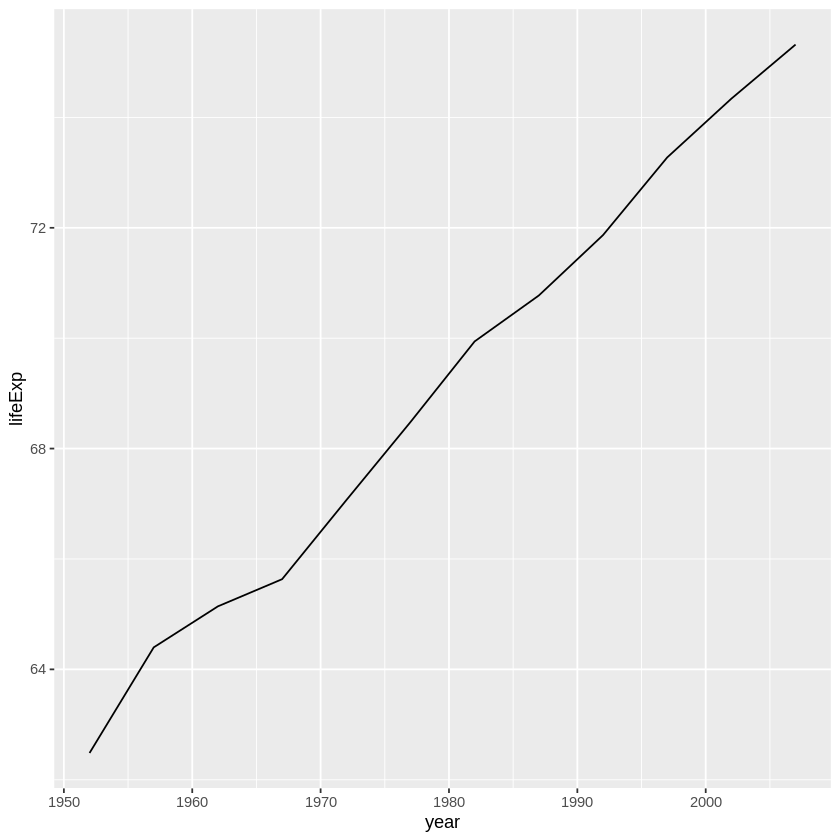

In [ ]:

gapminder_argentina <- gapminder_df %>% filter(country == "Argentina")

# Expectativa de vida al nacer en Argentina 1952-2007
ggplot(gapminder_argentina) + geom_line(aes(x = year, y = lifeExp))

In [ ]:
# PIB per cápita en Argentina 1952-2007
ggplot(gapminder_argentina) + geom_line(aes(x = year, y = gdpPercap))

Creo que podemos sacar nuestras primeras conclusiones para Argentina: la expectativa de vida parece haber crecido bastante estable durante todo el período bajo análisis, pero la evolución del PIB per cápita bien puede parecerse a lo que registra un sismógrafo !

Ordenando: la función arrange()
La función arrange nos permite ordenar un dataset en orden ascendente o descendente en base a los valores de las variables. Está parte del proceso suele ser relevante para algunas transformaciones de datos y para la inspección visual de valores extremos.

In [ ]:
# En sentido ascendente (del valor más bajo al más alto)
gapminder_df %>% arrange(lifeExp)

country           continent year lifeExp pop       gdpPercap
1    Rwanda            Africa    1992 23.599   7290203   737.0686
2    Afghanistan       Asia      1952 28.801   8425333   779.4453
3    Gambia            Africa    1952 30.000    284320   485.2307
4    Angola            Africa    1952 30.015   4232095  3520.6103
5    Sierra Leone      Africa    1952 30.331   2143249   879.7877
6    Afghanistan       Asia      1957 30.332   9240934   820.8530
7    Cambodia          Asia      1977 31.220   6978607   524.9722
8    Mozambique        Africa    1952 31.286   6446316   468.5260
9    Sierra Leone      Africa    1957 31.570   2295678  1004.4844
10   Burkina Faso      Africa    1952 31.975   4469979   543.2552
11   Afghanistan       Asia      1962 31.997  10267083   853.1007
12   Angola            Africa    1957 31.999   4561361  3827.9405
13   Gambia            Africa    1957 32.065    323150   520.9267
14   Guinea-Bissau     Africa    1952 32.500    580653   299.8503
15   Yemen, Rep.       Asia      1952 32.548   4963829   781.7176
16   Sierra Leone      Africa    1962 32.767   2467895  1116.6399
17   Somalia           Africa    1952 32.978   2526994  1135.7498
18   Guinea-Bissau     Africa    1957 33.489    601095   431.7905
19   Guinea            Africa    1952 33.609   2664249   510.1965
20   Mali              Africa    1952 33.685   3838168   452.3370
21   Mozambique        Africa    1957 33.779   7038035   495.5868
22   Gambia            Africa    1962 33.896    374020   599.6503
23   Yemen, Rep.       Asia      1957 33.970   5498090   804.8305
24   Angola            Africa    1962 34.000   4826015  4269.2767
25   Afghanistan       Asia      1967 34.020  11537966   836.1971
26   Ethiopia          Africa    1952 34.078  20860941   362.1463
27   Sierra Leone      Africa    1967 34.113   2662190  1206.0435
28   Equatorial Guinea Africa    1952 34.482    216964   375.6431
29   Guinea-Bissau     Africa    1962 34.488    627820   522.0344
30   Guinea            Africa    1957 34.558   2876726   576.2670
⋮    ⋮                 ⋮         ⋮    ⋮       ⋮         ⋮        
1675 Greece            Europe    2007 79.483   10706290 27538.41 
1676 France            Europe    2002 79.590   59925035 28926.03 
1677 Israel            Asia      2002 79.696    6029529 21905.60 
1678 Netherlands       Europe    2007 79.762   16570613 36797.93 
1679 Canada            Americas  2002 79.770   31902268 33328.97 
1680 Spain             Europe    2002 79.780   40152517 24835.47 
1681 Austria           Europe    2007 79.829    8199783 36126.49 
1682 Singapore         Asia      2007 79.972    4553009 47143.18 
1683 Hong Kong, China  Asia      1997 80.000    6495918 28377.63 
1684 Sweden            Europe    2002 80.040    8954175 29341.63 
1685 Norway            Europe    2007 80.196    4627926 49357.19 
1686 New Zealand       Oceania   2007 80.204    4115771 25185.01 
1687 Italy             Europe    2002 80.240   57926999 27968.10 
1688 Australia         Oceania   2002 80.370   19546792 30687.75 
1689 Iceland           Europe    2002 80.500     288030 31163.20 
1690 Italy             Europe    2007 80.546   58147733 28569.72 
1691 Switzerland       Europe    2002 80.620    7361757 34480.96 
1692 Canada            Americas  2007 80.653   33390141 36319.24 
1693 France            Europe    2007 80.657   61083916 30470.02 
1694 Japan             Asia      1997 80.690  125956499 28816.58 
1695 Israel            Asia      2007 80.745    6426679 25523.28 
1696 Sweden            Europe    2007 80.884    9031088 33859.75 
1697 Spain             Europe    2007 80.941   40448191 28821.06 
1698 Australia         Oceania   2007 81.235   20434176 34435.37 
1699 Hong Kong, China  Asia      2002 81.495    6762476 30209.02 
1700 Switzerland       Europe    2007 81.701    7554661 37506.42 
1701 Iceland           Europe    2007 81.757     301931 36180.79 
1702 Japan             Asia      2002 82.000  127065841 28604.59 
1703 Hong Kong, China  Asia      2007 82.208 

En sentido descendente (del valor más alto al más


In [ ]:
gapminder_df %>% arrange(desc(lifeExp))

country           continent year lifeExp pop       gdpPercap
1    Japan             Asia      2007 82.603  127467972 31656.07 
2    Hong Kong, China  Asia      2007 82.208    6980412 39724.98 
3    Japan             Asia      2002 82.000  127065841 28604.59 
4    Iceland           Europe    2007 81.757     301931 36180.79 
5    Switzerland       Europe    2007 81.701    7554661 37506.42 
6    Hong Kong, China  Asia      2002 81.495    6762476 30209.02 
7    Australia         Oceania   2007 81.235   20434176 34435.37 
8    Spain             Europe    2007 80.941   40448191 28821.06 
9    Sweden            Europe    2007 80.884    9031088 33859.75 
10   Israel            Asia      2007 80.745    6426679 25523.28 
11   Japan             Asia      1997 80.690  125956499 28816.58 
12   France            Europe    2007 80.657   61083916 30470.02 
13   Canada            Americas  2007 80.653   33390141 36319.24 
14   Switzerland       Europe    2002 80.620    7361757 34480.96 
15   Italy             Europe    2007 80.546   58147733 28569.72 
16   Iceland           Europe    2002 80.500     288030 31163.20 
17   Australia         Oceania   2002 80.370   19546792 30687.75 
18   Italy             Europe    2002 80.240   57926999 27968.10 
19   New Zealand       Oceania   2007 80.204    4115771 25185.01 
20   Norway            Europe    2007 80.196    4627926 49357.19 
21   Sweden            Europe    2002 80.040    8954175 29341.63 
22   Hong Kong, China  Asia      1997 80.000    6495918 28377.63 
23   Singapore         Asia      2007 79.972    4553009 47143.18 
24   Austria           Europe    2007 79.829    8199783 36126.49 
25   Spain             Europe    2002 79.780   40152517 24835.47 
26   Canada            Americas  2002 79.770   31902268 33328.97 
27   Netherlands       Europe    2007 79.762   16570613 36797.93 
28   Israel            Asia      2002 79.696    6029529 21905.60 
29   France            Europe    2002 79.590   59925035 28926.03 
30   Greece            Europe    2007 79.483   10706290 27538.41 
⋮    ⋮                 ⋮         ⋮    ⋮       ⋮         ⋮        
1675 Guinea            Africa    1957 34.558   2876726   576.2670
1676 Guinea-Bissau     Africa    1962 34.488    627820   522.0344
1677 Equatorial Guinea Africa    1952 34.482    216964   375.6431
1678 Sierra Leone      Africa    1967 34.113   2662190  1206.0435
1679 Ethiopia          Africa    1952 34.078  20860941   362.1463
1680 Afghanistan       Asia      1967 34.020  11537966   836.1971
1681 Angola            Africa    1962 34.000   4826015  4269.2767
1682 Yemen, Rep.       Asia      1957 33.970   5498090   804.8305
1683 Gambia            Africa    1962 33.896    374020   599.6503
1684 Mozambique        Africa    1957 33.779   7038035   495.5868
1685 Mali              Africa    1952 33.685   3838168   452.3370
1686 Guinea            Africa    1952 33.609   2664249   510.1965
1687 Guinea-Bissau     Africa    1957 33.489    601095   431.7905
1688 Somalia           Africa    1952 32.978   2526994  1135.7498
1689 Sierra Leone      Africa    1962 32.767   2467895  1116.6399
1690 Yemen, Rep.       Asia      1952 32.548   4963829   781.7176
1691 Guinea-Bissau     Africa    1952 32.500    580653   299.8503
1692 Gambia            Africa    1957 32.065    323150   520.9267
1693 Angola            Africa    1957 31.999   4561361  3827.9405
1694 Afghanistan       Asia      1962 31.997  10267083   853.1007
1695 Burkina Faso      Africa    1952 31.975   4469979   543.2552
1696 Sierra Leone      Africa    1957 31.570   2295678  1004.4844
1697 Mozambique        Africa    1952 31.286   6446316   468.5260
1698 Cambodia          Asia      1977 31.220   6978607   524.9722
1699 Afghanistan       Asia      1957 30.332   9240934   820.8530
1700 Sierra Leone      Africa    1952 30.331   2143249   879.7877
1701 Angola            Africa    1952 30.015   4232095  3520.6103
1702 Gambia            Africa    1952 30.000    284320   485.2307
1703 Afghanistan       Asia      1952 28.801 

Veamos una de las principales funcionalidades de tidyverse al combinar algunos de los comandos que aprendimos hasta ahora. Vamos a filtrar el dataset para el continente de América y el año 2007 y luego (recordar: está a la derecha del último pipe) ordenar las observaciones según la expectativa de vida al nacer, de mayor a menor:

In [ ]:
gapminder_df %>%
  filter(continent == "Americas", year == 2007) %>%
  arrange(desc(lifeExp))

country             continent year lifeExp pop       gdpPercap
1  Canada              Americas  2007 80.653   33390141 36319.235
2  Costa Rica          Americas  2007 78.782    4133884  9645.061
3  Puerto Rico         Americas  2007 78.746    3942491 19328.709
4  Chile               Americas  2007 78.553   16284741 13171.639
5  Cuba                Americas  2007 78.273   11416987  8948.103
6  United States       Americas  2007 78.242  301139947 42951.653
7  Uruguay             Americas  2007 76.384    3447496 10611.463
8  Mexico              Americas  2007 76.195  108700891 11977.575
9  Panama              Americas  2007 75.537    3242173  9809.186
10 Argentina           Americas  2007 75.320   40301927 12779.380
11 Ecuador             Americas  2007 74.994   13755680  6873.262
12 Venezuela           Americas  2007 73.747   26084662 11415.806
13 Nicaragua           Americas  2007 72.899    5675356  2749.321
14 Colombia            Americas  2007 72.889   44227550  7006.580
15 Jamaica             Americas  2007 72.567    2780132  7320.880
16 Brazil              Americas  2007 72.390  190010647  9065.801
17 Dominican Republic  Americas  2007 72.235    9319622  6025.375
18 El Salvador         Americas  2007 71.878    6939688  5728.354
19 Paraguay            Americas  2007 71.752    6667147  4172.838
20 Peru                Americas  2007 71.421   28674757  7408.906
21 Guatemala           Americas  2007 70.259   12572928  5186.050
22 Honduras            Americas  2007 70.198    7483763  3548.331
23 Trinidad and Tobago Americas  2007 69.819    1056608 18008.509
24 Bolivia             Americas  2007 65.554    9119152  3822.137
25 Haiti               Americas  2007 60.916    8502814  1201.637

Creando y modificando variables: mutate()
Crear nuevas variables en base a los valores de otras variables que ya existen suele ser una parte necesaria para enriquecer el análisis. En el marco de tidyverse la forma de lograrlo es a través del verb (verb es tan solo otra forma de llamar a las funciones en el contexto de tidyverse) mutate(). Imagemos, por ejemplo, que queremos la población medida en millones de personas para hacer más fácil su lectura:

In [ ]:
new_gapminder <- gapminder_df %>% mutate(pop = pop / 1000000)
head(new_gapminder, n = 3) # Head nos permite ver solo una determinada cantidad de filas

country     continent year lifeExp pop       gdpPercap
1 Afghanistan Asia      1952 28.801   8.425333 779.4453 
2 Afghanistan Asia      1957 30.332   9.240934 820.8530 
3 Afghanistan Asia      1962 31.997  10.267083 853.1007

La sintaxis es simple: del lado izquierdo de la igualdad escribimos el nombre de la variable y del lado derecho definimos su valor (en este caso, el valor de pop dividido por un millón). Al utilizar el nombre de una variable que anteriormente ya existía no creamos una nueva, sino que reemplazamos a pop. Si escribimos el nombre de una variable que no existe R agrega esa variable al dataset:

In [ ]:
# Calcuando el PIB
gapminder_df %>%
  mutate(gdp = gdpPercap * pop)

Resumiendo y transformando datos en base a grupos
Muchas veces es necesario resumir diversas variables de un dataset en base a grupos. En nuestro ejemplo, preguntas que precisarían de agrupar datos serían algunas como las siguientes:

¿Cuál es la expectativa de vida al nacer promedio por continente para cada uno de los años?
¿Cuál es el país más pobre y más rico, medido por PIB per cápita, de cada continente para cada uno de los años?
¿Cuál es la diferencia en la expectativa de vida al nacer para cada país con respecto a la media del continente para cada año?
Para responder estas preguntas, tidyverse brinda dos funciones: group_by(), para agrupar observaciones según categorías de una variable, y summarise(), para aplicar alguna transformación sobre cada conjunto de datos. Veamos cómo podríamos resolver estas tres preguntas con estas funciones y otras que ya hemos aprendido.

In [ ]:
# Primera pregunta
gapminder_df %>%
  group_by(year, continent) %>%
  summarise(mean_lifeExp = mean(lifeExp))

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year continent mean_lifeExp
1  1952 Africa    39.13550    
2  1952 Americas  53.27984    
3  1952 Asia      46.31439    
4  1952 Europe    64.40850    
5  1952 Oceania   69.25500    
6  1957 Africa    41.26635    
7  1957 Americas  55.96028    
8  1957 Asia      49.31854    
9  1957 Europe    66.70307    
10 1957 Oceania   70.29500    
11 1962 Africa    43.31944    
12 1962 Americas  58.39876    
13 1962 Asia      51.56322    
14 1962 Europe    68.53923    
15 1962 Oceania   71.08500    
16 1967 Africa    45.33454    
17 1967 Americas  60.41092    
18 1967 Asia      54.66364    
19 1967 Europe    69.73760    
20 1967 Oceania   71.31000    
21 1972 Africa    47.45094    
22 1972 Americas  62.39492    
23 1972 Asia      57.31927    
24 1972 Europe    70.77503    
25 1972 Oceania   71.91000    
26 1977 Africa    49.58042    
27 1977 Americas  64.39156    
28 1977 Asia      59.61056    
29 1977 Europe    71.93777    
30 1977 Oceania   72.85500    
31 1982 Africa    51.59287    
32 1982 Americas  66.22884    
33 1982 Asia      62.61794    
34 1982 Europe    72.80640    
35 1982 Oceania   74.29000    
36 1987 Africa    53.34479    
37 1987 Americas  68.09072    
38 1987 Asia      64.85118    
39 1987 Europe    73.64217    
40 1987 Oceania   75.32000    
41 1992 Africa    53.62958    
42 1992 Americas  69.56836    
43 1992 Asia      66.53721    
44 1992 Europe    74.44010    
45 1992 Oceania   76.94500    
46 1997 Africa    53.59827    
47 1997 Americas  71.15048    
48 1997 Asia      68.02052    
49 1997 Europe    75.50517    
50 1997 Oceania   78.19000    
51 2002 Africa    53.32523    
52 2002 Americas  72.42204    
53 2002 Asia      69.23388    
54 2002 Europe    76.70060    
55 2002 Oceania   79.74000    
56 2007 Africa    54.80604    
57 2007 Americas  73.60812    
58 2007 Asia      70.72848    
59 2007 Europe    77.64860    
60 2007 Oceania   80.71950

In [ ]:
# Segunda pregunta
gapminder_df %>% group_by(year, continent) %>%
  summarise(poor_country = min(gdpPercap),
            rich_country = max(gdpPercap),
            poor_country_nom = country[gdpPercap == poor_country],
            rich_country_nom = country[gdpPercap == rich_country])

In [ ]:
# Tercera pregunta
gapminder_df %>% group_by(year, continent) %>%
  mutate(dif_lifeExp = lifeExp - mean(lifeExp))

country     continent year lifeExp pop      gdpPercap dif_lifeExp
1    Afghanistan Asia      1952 28.801   8425333  779.4453 -17.513394 
2    Afghanistan Asia      1957 30.332   9240934  820.8530 -18.986544 
3    Afghanistan Asia      1962 31.997  10267083  853.1007 -19.566223 
4    Afghanistan Asia      1967 34.020  11537966  836.1971 -20.643640 
5    Afghanistan Asia      1972 36.088  13079460  739.9811 -21.231269 
6    Afghanistan Asia      1977 38.438  14880372  786.1134 -21.172556 
7    Afghanistan Asia      1982 39.854  12881816  978.0114 -22.763939 
8    Afghanistan Asia      1987 40.822  13867957  852.3959 -24.029182 
9    Afghanistan Asia      1992 41.674  16317921  649.3414 -24.863212 
10   Afghanistan Asia      1997 41.763  22227415  635.3414 -26.257515 
11   Afghanistan Asia      2002 42.129  25268405  726.7341 -27.104879 
12   Afghanistan Asia      2007 43.828  31889923  974.5803 -26.900485 
13   Albania     Europe    1952 55.230   1282697 1601.0561  -9.178500 
14   Albania     Europe    1957 59.280   1476505 1942.2842  -7.423067 
15   Albania     Europe    1962 64.820   1728137 2312.8890  -3.719233 
16   Albania     Europe    1967 66.220   1984060 2760.1969  -3.517600 
17   Albania     Europe    1972 67.690   2263554 3313.4222  -3.085033 
18   Albania     Europe    1977 68.930   2509048 3533.0039  -3.007767 
19   Albania     Europe    1982 70.420   2780097 3630.8807  -2.386400 
20   Albania     Europe    1987 72.000   3075321 3738.9327  -1.642167 
21   Albania     Europe    1992 71.581   3326498 2497.4379  -2.859100 
22   Albania     Europe    1997 72.950   3428038 3193.0546  -2.555167 
23   Albania     Europe    2002 75.651   3508512 4604.2117  -1.049600 
24   Albania     Europe    2007 76.423   3600523 5937.0295  -1.225600 
25   Algeria     Africa    1952 43.077   9279525 2449.0082   3.941500 
26   Algeria     Africa    1957 45.685  10270856 3013.9760   4.418654 
27   Algeria     Africa    1962 48.303  11000948 2550.8169   4.983558 
28   Algeria     Africa    1967 51.407  12760499 3246.9918   6.072462 
29   Algeria     Africa    1972 54.518  14760787 4182.6638   7.067058 
30   Algeria     Africa    1977 58.014  17152804 4910.4168   8.433577 
⋮    ⋮           ⋮         ⋮    ⋮       ⋮        ⋮         ⋮          
1675 Yemen, Rep. Asia      1982 49.113   9657618 1977.5570 -13.5049394
1676 Yemen, Rep. Asia      1987 52.922  11219340 1971.7415 -11.9291818
1677 Yemen, Rep. Asia      1992 55.599  13367997 1879.4967 -10.9382121
1678 Yemen, Rep. Asia      1997 58.020  15826497 2117.4845 -10.0005152
1679 Yemen, Rep. Asia      2002 60.308  18701257 2234.8208  -8.9258788
1680 Yemen, Rep. Asia      2007 62.698  22211743 2280.7699  -8.0304848
1681 Zambia      Africa    1952 42.038   2672000 1147.3888   2.9025000
1682 Zambia      Africa    1957 44.077   3016000 1311.9568   2.8106538
1683 Zambia      Africa    1962 46.023   3421000 1452.7258   2.7035577
1684 Zambia      Africa    1967 47.768   3900000 1777.0773   2.4334615
1685 Zambia      Africa    1972 50.107   4506497 1773.4983   2.6560577
1686 Zambia      Africa    1977 51.386   5216550 1588.6883   1.8055769
1687 Zambia      Africa    1982 51.821   6100407 1408.6786   0.2281346
1688 Zambia      Africa    1987 50.821   7272406 1213.3151  -2.5237885
1689 Zambia      Africa    1992 46.100   8381163 1210.8846  -7.5295769
1690 Zambia      Africa    1997 40.238   9417789 1071.3538 -13.3602692
1691 Zambia      Africa    2002 39.193  10595811 1071.6139 -14.1322308
1692 Zambia      Africa    2007 42.384  11746035 1271.2116 -12.4220385
1693 Zimbabwe    Africa    1952 48.451   3080907  406.8841   9.3155000
1694 Zimbabwe    Africa    1957 50.469   3646340  518.7643   9.2026538
1695 Zimbabwe    Africa    1962 52.358   4277736  527.2722   9.0385577
1696 Zimbabwe    Africa    1967 53.995   4995432  569.7951   8.6604615
1697 Zimbabwe    Africa    1972 55.635   5861135  799.3622   8.1840577
1698 Zimbabwe    Africa    1977 57.674   6642107  685.5877   8.0935769
1699 Zimbabwe    Africa    19

Las tres respuestas comienzan de la misma manera, es decir con la función group_by(). Entre los paréntesis hay que colocar los nombres de las variables por las cuáles se quiere agrupar, en nuestro caso las variables year y continent. De esta manera todo lo que siga después de la próxima pipe se aplicará sobre cada uno de los grupos generados por las combinaciones año y continente.

En el caso de la primera respuesta, usamos la función summarise(), que devuelve un Data Frame (en rigor, tibble) con resúmenes para cada uno de los grupos. Debido a que existen 12 “fotos” de las variables (una cada cinco años) y se definen 5 continentes (África, América, Asia, Europa y Oceanía), el data frame que devuelve tiene 60 filas (12 países multiplicado por 5 continentes da 60 grupos).

Dentro de los paréntesis de summarise() podemos crear tantas variables como queramos. En el primer caso, creamos una variable que se llama mean_lifeExp que recibe el resultado de aplicar mean() a la variable lifeExp. Esta función es aplicada a cada uno de los grupos que definimos anteriormente.

En el segundo caso hacemos algo similar a lo anterior, pero definimos cuatro variables. poor_country busca el valor mínimo del PIB per cápita para cada grupo a través de min(), rich_country hace lo opuesto a través de la función max(), poor_country_nom busca el nombre que corresponde al PIB per cápita más bajo y rich_country_nom busca el nombre que corresponde al PIB per cápita más alto. Estas últimas dos variables se generan a través de filtrar el vector country y buscar el valor que corresponde al PIB per cápita más bajo o alto, según corresponda, mediante el código country[gdpPercap == poor_country].

Finalmente, la tercera parte del código combina las funciones group_by() y mutate(), que ya vimos anteriormente. La novedad es que ahora podemos utilizarla para crear nuevas variables en el dataset basadas en agregaciones de otras variables. En este ejemplo, creamos la variable dif_lifeExp, que toma la diferencia entre la expectativa de vida al nacer para cada observación y la media de cada grupo (en nuestro caso, año y continente).

Transformando la presentación de los datos: pivot_wider y pivot_longer
Los datos pueden venir presentados en dos formatos: largo o ancho. Los datasets con formato largo tienen pocas columnas y muchas filas, mientras los de formato ancho poseen muchas columnas y pocas filas. Sin embargo, en ambas representaciones los datos son exactamente los mismos. Representación de datos en formato largo y ancho

En diversas situaciones es preferible tener una de las dos representaciones. Por ejemplo, para graficar con la librería ggplot2 muchas veces es conveniente contar con representaciones en formato largo de los datos. Tidyverse ofrece dos métodos que sirven para este propósito: pivot_wider() y pivot_longer() (estas funciones reemplazaron a gather() y a spread(), respectivamente).

pivot_wider(): toma un conjunto de variables (vectores/columnas) y las colapsa en una sola columna con valores que resumen los datos de ese conjunto de variables. Hace que el data frame sea más largo
pivot_longer(): toma dos variables y las descompone entre múltiples variables (hace que el data frame sea más ancho)
Como pueden ver, no existe una medida absoluta de largo o ancho. Simplemente un dataset puede tener una representación más ancha o más larga.

Vamos a exportar una tabla desde R para que lo puedan usar en otro software. En general, cuando los datos ya han sido procesados, las salidas se muestran en tablas más bien anchas. Con los datos que contamos vamos a crear un archivo .csv que tenga en las filas a los paises y en las columnas a los años (como valor, a la pboblación en millones).

In [ ]:
# Nos quedamos con tres coolumnas: country, year y pop.
# Además, con mutate hacemos que la población esté representada por millones
gapminder_sub <- gapminder_df %>%
                 select(country,year,pop) %>%
                 mutate(pop = round(pop / 1000000,1))
head(gapminder_sub,n = 5) # Muestra las primeras cinco filas

country     year pop 
1 Afghanistan 1952  8.4
2 Afghanistan 1957  9.2
3 Afghanistan 1962 10.3
4 Afghanistan 1967 11.5
5 Afghanistan 1972 13.1

In [ ]:
masAncho <- gapminder_sub %>%
            pivot_wider(names_from = year,values_from = pop)
head(masAncho,6)

country     1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007
1 Afghanistan  8.4  9.2 10.3 11.5 13.1 14.9 12.9 13.9 16.3 22.2 25.3 31.9
2 Albania      1.3  1.5  1.7  2.0  2.3  2.5  2.8  3.1  3.3  3.4  3.5  3.6
3 Algeria      9.3 10.3 11.0 12.8 14.8 17.2 20.0 23.3 26.3 29.1 31.3 33.3
4 Angola       4.2  4.6  4.8  5.2  5.9  6.2  7.0  7.9  8.7  9.9 10.9 12.4
5 Argentina   17.9 19.6 21.3 22.9 24.8 27.0 29.3 31.6 34.0 36.2 38.3 40.3
6 Australia    8.7  9.7 10.8 11.9 13.2 14.1 15.2 16.3 17.5 18.6 19.5 20.4

La función pivot_wider() necesita solo dos parámetros. En primer lugar, debemos decirle de cuál columna hay que tomar los nuevos nombres de columnas en el parámetro names_from. Sn segundo lugar, solo tenemos que decirle de qué columna tiene que tomar los valores, en values_from.

¿Qué tenemos que hacer para guardar esta salida? usamos la función write.table(). Vamos a usar cuatro parámetros. En x solo tenemos que pasarle el objeto a escribir, en file un nombre de archivo (vean que es .csv), en sep usamos un caracter que queremos que use para separar a las columnas (recomiendo usar ;). Finalmente, en el parámetro row.names usamos FALSE con el objetivo que no incluya el número de filas en la salida

In [ ]:
write.table(x = masAncho,
            file = 'PaisPob.csv',
            sep = ';',
            row.names=FALSE)